# 속성 데이터 회귀 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/car_regression.csv

--2021-10-07 22:52:38--  https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/car_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘car_regression.csv’

car_regression.csv  100%[===================>]  57.32K  --.-KB/s    in 0.01s   

2021-10-07 22:52:38 (5.36 MB/s) - ‘car_regression.csv’ saved [58697/58697]



In [3]:
raw_data = pd.read_csv("car_regression.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [4]:
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,-0.185255,0.309571,0.531211,0.013785,0.441976,-0.377448,0.005540,1.0,0.0,0.0
1,0.327236,-0.862911,-0.367073,-0.323955,-0.462189,-0.377448,1.634321,1.0,0.0,0.0
2,-1.338361,1.482053,1.181033,1.182885,0.915250,-0.558682,0.005540,1.0,0.0,0.0
3,1.608465,-0.862911,-0.567753,-0.531795,-0.715308,-0.921150,1.634321,1.0,0.0,0.0
4,-1.338361,1.482053,1.496388,1.390725,1.631047,-0.921150,-0.808850,1.0,0.0,0.0


In [5]:
print(train_x[:5])
print(train_y[:5])

[[ 0.30957112  0.53121066  0.0137853   0.44197632 -0.37744756  0.00554007
   1.          0.          0.        ]
 [-0.86291079 -0.36707301 -0.32395459 -0.4621886  -0.37744756  1.63432105
   1.          0.          0.        ]
 [ 1.48205303  1.18103289  1.18288491  0.91525015 -0.55868157  0.00554007
   1.          0.          0.        ]
 [-0.86291079 -0.56775341 -0.53179452 -0.71530769 -0.92114958  1.63432105
   1.          0.          0.        ]
 [ 1.48205303  1.49638779  1.39072484  1.63104738 -0.92114958 -0.80885042
   1.          0.          0.        ]]
[[-0.18525522]
 [ 0.32723628]
 [-1.3383611 ]
 [ 1.60846503]
 [-1.3383611 ]]


In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 9)
(313, 1)
(79, 9)
(79, 1)


# Template
- 출력값 혹은 레이블링 값은 0.3, -1.7과 같은 숫자 값
- 입력층 노드 개수는 특질 수
- 출력층 노드 개수는 1개
- 출력층 활성화 함수는 없다.
- 사용하는 loss는 ‘mse’


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


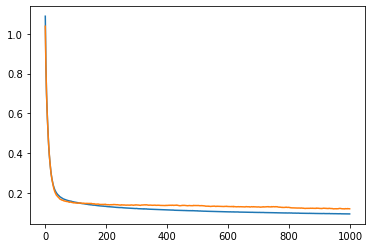

3/3 [==============================] - 0s 4ms/step - loss: 0.1353 - mae: 0.2504
loss= 0.1352887898683548
mae= 0.2504035234451294


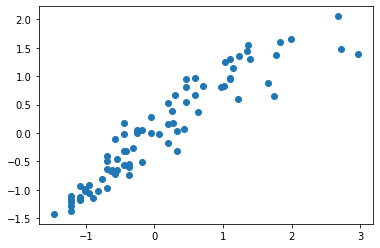

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense

model = keras.Sequential()
model.add(Input(9)) # 수정할 곳. 노드수를 입력 데이터 특질 수로 설정.
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer="SGD", loss="mse", metrics=["mae"]) # loss는 mse를 사용
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()